In [11]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [12]:
!kaggle datasets download -d moltean/fruits

100% 1.28G/1.28G [01:00<00:00, 23.7MB/s]
100% 1.28G/1.28G [01:00<00:00, 23.0MB/s]


In [13]:
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!unzip /content/fruits.zip

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [16]:
train_path = "/content/fruits-360-original-size/fruits-360-original-size/Training"
test_path = "/content/fruits-360-original-size/fruits-360-original-size/Test"
valid_path = "/content/fruits-360-original-size/fruits-360-original-size/Validation"
batch_size = 32
image_size = (100, 100)

In [17]:
image_gen = ImageDataGenerator(
    rescale=1./255,
    width_shift_range=0.1,
    height_shift_range=0.1,
    rotation_range=10,
    zoom_range=0.1,
    horizontal_flip=True,
    vertical_flip=True
)

In [18]:
train_data = image_gen.flow_from_directory(
    train_path,
    target_size=image_size,
    batch_size=batch_size,
)
test_data = image_gen.flow_from_directory(
    test_path,
    target_size=image_size,
    batch_size=batch_size,
)
valid_data = image_gen.flow_from_directory(
    valid_path,
    target_size=image_size,
    batch_size=batch_size,
)

Found 6231 images belonging to 24 classes.
Found 3110 images belonging to 24 classes.
Found 3114 images belonging to 24 classes.


In [19]:
fruits = ['apple',
 'apple braeburn',
 'apple crimson snow',
 'apple golden',
 'apple golden',
 'apple golden',
 'apple granny smith',
 'apple hit',
 'apple pink lady',
 'apple red',
 'apple red',
 'apple red',
 'apple red delicios',
 'apple red yellow',
 'apple rotten',
 'cabbage white',
 'carrot',
 'cucumber',
 'cucumber',
 'eggplant violet',
 'pear',
 'pear',
 'zucchini',
 'zucchini dark']

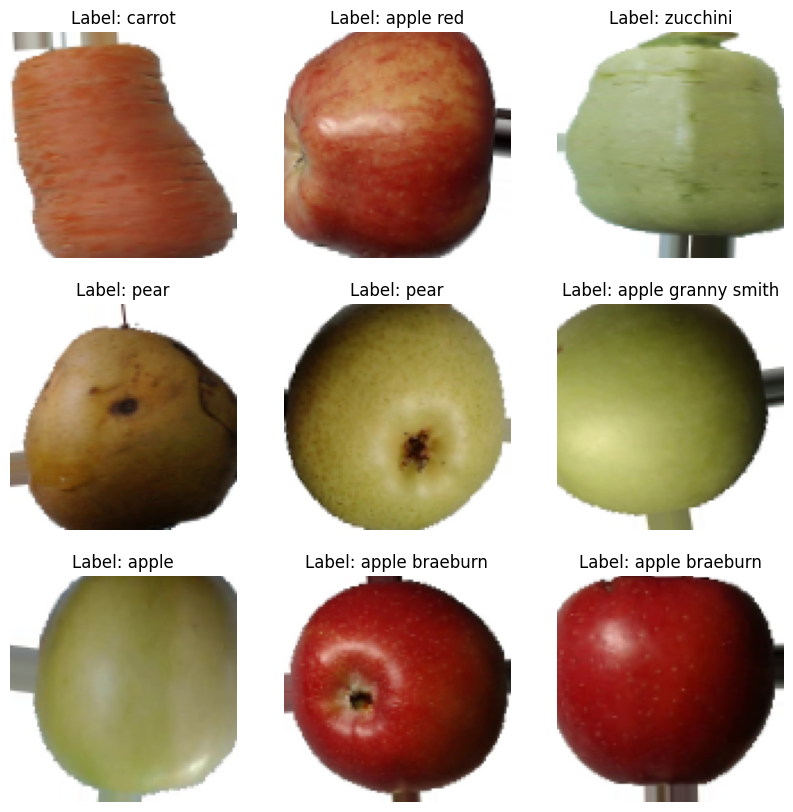

In [20]:
images, labels = next(train_data)

plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(images[i])
    plt.title(f'Label: {fruits[labels[i].argmax()]}')
    plt.axis('off')
plt.show()

In [21]:
from tensorflow import keras

In [46]:
model = keras.Sequential([
    keras.layers.Conv2D(64, kernel_size=3, input_shape=(100, 100, 3)),
    keras.layers.BatchNormalization(),
    keras.layers.Activation('relu'),
    keras.layers.MaxPooling2D(pool_size=2),
    keras.layers.Conv2D(64, kernel_size=3),
    keras.layers.BatchNormalization(),
    keras.layers.Activation('relu'),
    keras.layers.Conv2D(64, kernel_size=3),
    keras.layers.BatchNormalization(),
    keras.layers.Activation('relu'),
    keras.layers.MaxPooling2D(pool_size=2),
    keras.layers.Conv2D(128, kernel_size=3),
    keras.layers.BatchNormalization(),
    keras.layers.Activation('relu'),
    keras.layers.MaxPooling2D(pool_size=2),
    keras.layers.Conv2D(128, kernel_size=3),
    keras.layers.BatchNormalization(),
    keras.layers.Activation('relu'),
    keras.layers.MaxPooling2D(pool_size=2),
    keras.layers.Conv2D(256, kernel_size=3),
    keras.layers.BatchNormalization(),
    keras.layers.Activation('relu'),
    keras.layers.MaxPooling2D(pool_size=2),
    keras.layers.Flatten(),
    keras.layers.Dense(64),
    keras.layers.BatchNormalization(),
    keras.layers.Activation('relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(128),
    keras.layers.BatchNormalization(),
    keras.layers.Activation('relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(24, activation="softmax")
])

In [47]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_22 (Conv2D)          (None, 98, 98, 64)        1792      
                                                                 
 batch_normalization_29 (Ba  (None, 98, 98, 64)        256       
 tchNormalization)                                               
                                                                 
 activation_29 (Activation)  (None, 98, 98, 64)        0         
                                                                 
 max_pooling2d_20 (MaxPooli  (None, 49, 49, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_23 (Conv2D)          (None, 47, 47, 64)        36928     
                                                                 
 batch_normalization_30 (Ba  (None, 47, 47, 64)       

In [48]:
early_stopping = keras.callbacks.EarlyStopping(monitor="val_loss", patience=2)

In [49]:
checkpoint = keras. callbacks.ModelCheckpoint("/content/", monitor='val_loss',  save_best_only=True)

In [50]:
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0001), loss="categorical_crossentropy", metrics=["accuracy"])

In [51]:
history = model.fit(train_data, epochs=12, validation_data=valid_data, callbacks=[early_stopping, checkpoint], batch_size=batch_size)

Epoch 1/12
195/195 [==============================] - 51s 233ms/step - loss: 2.0497 - accuracy: 0.4307 - val_loss: 3.4250 - val_accuracy: 0.0507
Epoch 2/12
195/195 [==============================] - 45s 233ms/step - loss: 1.1894 - accuracy: 0.7293 - val_loss: 3.3008 - val_accuracy: 0.0854
Epoch 3/12
195/195 [==============================] - 46s 235ms/step - loss: 0.8451 - accuracy: 0.8265 - val_loss: 0.9897 - val_accuracy: 0.7604
Epoch 4/12
195/195 [==============================] - 44s 227ms/step - loss: 0.6370 - accuracy: 0.8753 - val_loss: 0.2429 - val_accuracy: 0.9698
Epoch 5/12
195/195 [==============================] - 46s 239ms/step - loss: 0.5095 - accuracy: 0.9058 - val_loss: 0.2166 - val_accuracy: 0.9634
Epoch 6/12
195/195 [==============================] - 41s 212ms/step - loss: 0.4161 - accuracy: 0.9231 - val_loss: 0.2289 - val_accuracy: 0.9457
Epoch 7/12
195/195 [==============================] - 46s 235ms/step - loss: 0.3486 - accuracy: 0.9318 - val_loss: 0.1100 - val_ac

In [56]:
loss, acc = model.evaluate(test_data)

98/98 [==============================] - 24s 242ms/step - loss: 0.0312 - accuracy: 0.9965


In [58]:
print(f"Loss = {round(loss * 100, 2) }% Accuracy = {round(acc * 100, 2) }%")

Loss = 3.12% Accuracy = 99.65%


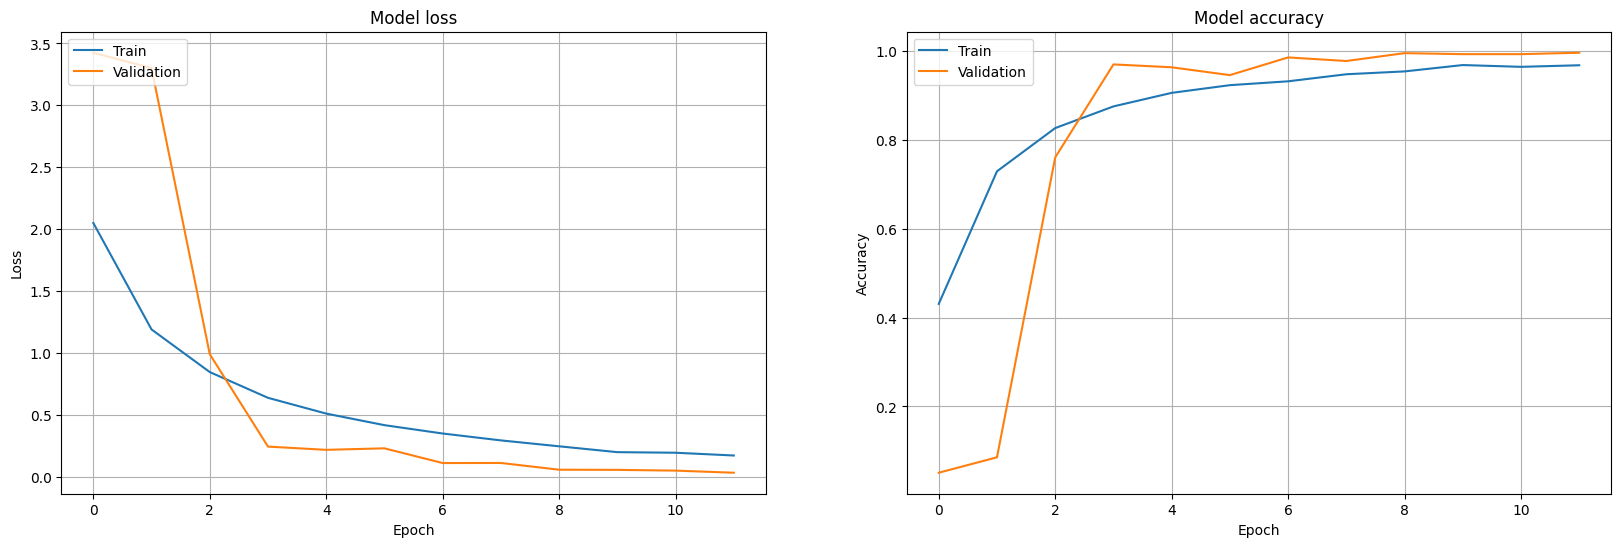

In [53]:
fig, ax = plt.subplots(1, 2, figsize=(20, 6))

ax[0].plot(history.history['loss'], label='Train')
ax[0].plot(history.history['val_loss'], label='Validation')
ax[0].set_title('Model loss')
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('Loss')
ax[0].legend(loc='upper left')
ax[0].grid(True)

ax[1].plot(history.history['accuracy'], label='Train')
ax[1].plot(history.history['val_accuracy'], label='Validation')
ax[1].set_title('Model accuracy')
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Accuracy')
ax[1].legend(loc='upper left')
ax[1].grid(True)
plt.show()

In [54]:
model.save("fruits.keras")